In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare


In [2]:
# Load the dataset
data = pd.read_excel("/Users/lvmacpro/Desktop/724_Applied_Econm/A2/A2_data.xlsx", sheet_name="Sheet1")


In [3]:

# Rename variables
data.rename(columns={"otherrace": "otherethnicity"}, inplace=True)

# Order variables
data = data[["id", "year", "financial_distress", "wealth", "pd", "education", "income", "age", "male", "employed",
          "divorce", "marriage", "childbirth", "familydeath", "laidoff", "missedwork", "white",
          "black", "hispanic", "otherethnicity", "collegedegree", "studentloan", "socioeconomic",
          "head", "notmoved", "nofamichange"]]

data = data.sort_values(by=["id", "year"])
data

,id,year,financial_distress,wealth,pd,education,income,age,male,employed,...,white,black,hispanic,otherethnicity,collegedegree,studentloan,socioeconomic,head,notmoved,nofamichange
0,10-172,0,0,84500,7.0,11.0,10.0,25.0,1.0,1.0,...,0.0,1.0,0.0,0.0,5.0,NaN,3686.0,0,0,1
1,10-176,0,0,32500,2.0,15.0,10.0,39.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,NaN,10305.0,1,1,1
2,10-177,0,0,19500,0.0,12.0,10.0,37.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,NaN,29397.0,1,1,1
3,10-177,1,0,66900,0.0,12.0,10.0,39.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,NaN,13792.0,1,1,1
4,10-177,2,0,1000,0.0,12.0,11.0,41.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,NaN,329.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210383,999-5,3,1,-34300,11.0,13.0,12.0,48.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,NaN,53534.0,1,1,0
210384,999-5,4,1,-3000,4.0,14.0,11.0,46.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,NaN,46952.0,1,1,1
210385,999-5,5,1,-9000,4.0,14.0,11.0,48.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,69265.0,1,1,1
210386,999-5,6,1,-14000,5.0,14.0,11.0,50.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,67951.0,1,1,1


In [4]:
stats = data.describe(percentiles=[.01, .99])
stats_transposed = stats.T
#stats_transposed = stats_transposed.to_string(float_format=lambda x: f"{x:.2f}")
#stats_transposed
stats

,year,financial_distress,wealth,pd,education,income,age,male,employed,divorce,...,white,black,hispanic,otherethnicity,collegedegree,studentloan,socioeconomic,head,notmoved,nofamichange
count,210388.000000,210388.000000,2.103880e+05,201659.000000,197122.000000,203764.000000,204856.000000,204905.000000,204905.000000,210388.000000,...,210367.000000,210367.000000,210367.000000,210367.000000,204832.000000,79823.000000,2.103020e+05,210388.000000,210388.000000,210388.000000
mean,3.614645,0.152865,2.203303e+05,3.365597,12.928176,10.741667,43.458122,0.728694,0.750709,0.071245,...,0.538259,0.357713,0.017389,0.086639,1.278003,9664.372675,3.731887e+04,0.357468,0.875825,0.864902
std,2.545900,0.359858,1.058502e+06,3.975941,2.742552,1.032979,14.264161,0.444635,0.432604,0.257234,...,0.498535,0.479328,0.130715,0.281306,1.939108,29444.259879,1.029225e+05,0.479255,0.329782,0.341829
min,0.000000,0.000000,-3.197000e+06,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.635200e+04,0.000000,0.000000,0.000000
1%,0.000000,0.000000,-9.877000e+04,0.000000,3.000000,8.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.589200e+04,0.000000,0.000000,0.000000
50%,3.000000,0.000000,3.301000e+04,2.000000,12.000000,11.000000,42.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.833900e+04,0.000000,1.000000,1.000000
99%,8.000000,1.000000,2.782000e+06,18.000000,17.000000,13.000000,83.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,150000.000000,3.087587e+05,1.000000,1.000000,1.000000
max,8.000000,1.000000,1.005550e+08,24.000000,17.000000,16.000000,101.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,9.000000,700000.000000,6.278577e+06,1.000000,1.000000,1.000000


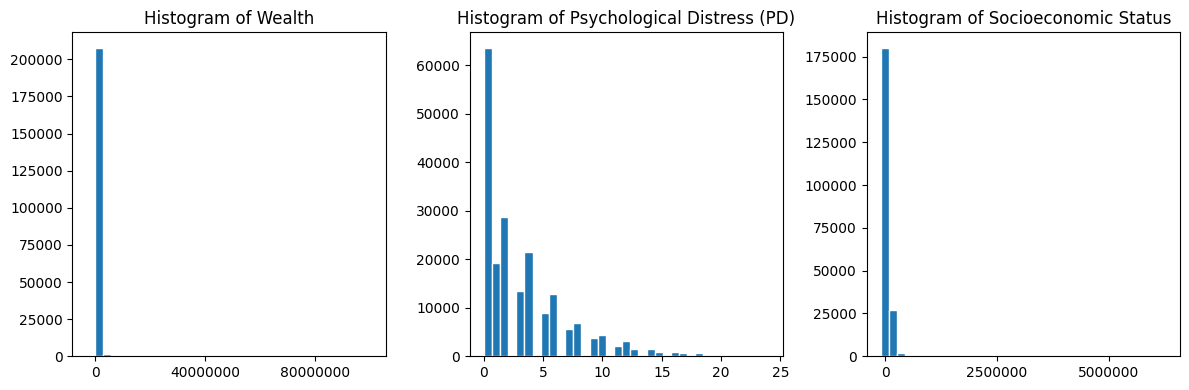

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(data["wealth"], bins=35, edgecolor="w")
axes[0].set_title("Histogram of Wealth")
axes[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[0].yaxis.get_major_formatter().set_scientific(False)
axes[0].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[0].xaxis.get_major_formatter().set_scientific(False)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

axes[1].hist(data["pd"], bins=35, edgecolor="w")
axes[1].set_title("Histogram of Psychological Distress (PD)")
axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].yaxis.get_major_formatter().set_scientific(False)
axes[1].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].xaxis.get_major_formatter().set_scientific(False)

axes[2].hist(data["socioeconomic"], bins=35, edgecolor="w")
axes[2].set_title("Histogram of Socioeconomic Status")
axes[2].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[2].yaxis.get_major_formatter().set_scientific(False)
axes[2].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[2].xaxis.get_major_formatter().set_scientific(False)
axes[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

plt.tight_layout()
plt.show()


In [6]:
df_trimmed = data[
    (data["wealth"] > -128000) & (data["wealth"] < 3355000) & (data["socioeconomic"] > -38538) & (data["socioeconomic"] < 320530)]

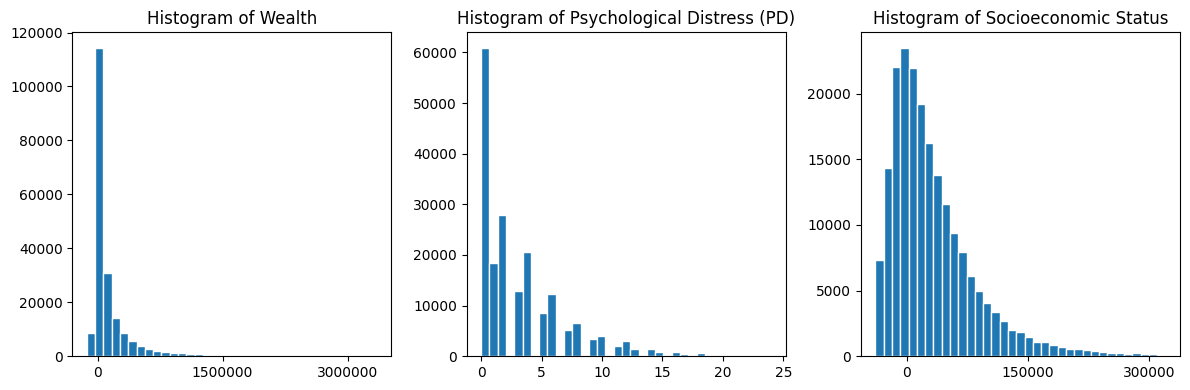

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(df_trimmed["wealth"], bins=35, edgecolor="w")
axes[0].set_title("Histogram of Wealth")
axes[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[0].yaxis.get_major_formatter().set_scientific(False)
axes[0].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[0].xaxis.get_major_formatter().set_scientific(False)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

axes[1].hist(df_trimmed["pd"], bins=35, edgecolor="w")
axes[1].set_title("Histogram of Psychological Distress (PD)")
axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].yaxis.get_major_formatter().set_scientific(False)
axes[1].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].xaxis.get_major_formatter().set_scientific(False)

axes[2].hist(df_trimmed["socioeconomic"], bins=35, edgecolor="w")
axes[2].set_title("Histogram of Socioeconomic Status")
axes[2].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[2].yaxis.get_major_formatter().set_scientific(False)
axes[2].xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[2].xaxis.get_major_formatter().set_scientific(False)
axes[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

plt.tight_layout()
plt.show()


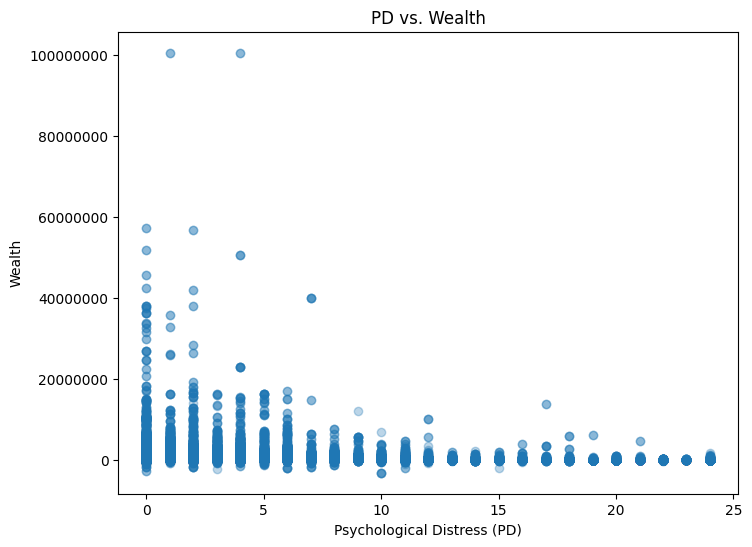

In [8]:
# Scatter plot of PD vs. Wealth
plt.figure(figsize=(8, 6))
plt.scatter(data["pd"], data["wealth"], alpha=0.3)
plt.title("PD vs. Wealth")
plt.ylabel("Wealth")
plt.xlabel("Psychological Distress (PD)")

# Use ScalarFormatter to format the y-axis values
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

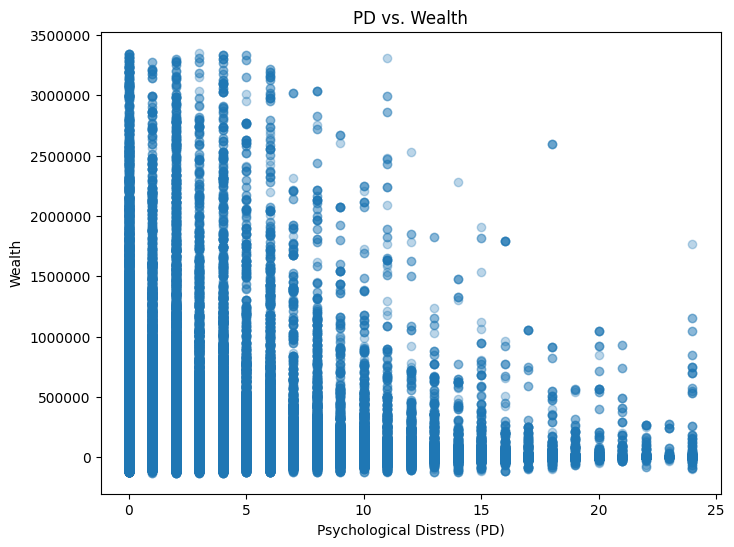

In [9]:
# Scatter plot of PD vs. Wealth
plt.figure(figsize=(8, 6))
plt.scatter(df_trimmed["pd"], df_trimmed["wealth"], alpha=0.3)
plt.title("PD vs. Wealth")
plt.ylabel("Wealth")
plt.xlabel("Psychological Distress (PD)")

# Use ScalarFormatter to format the y-axis values
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

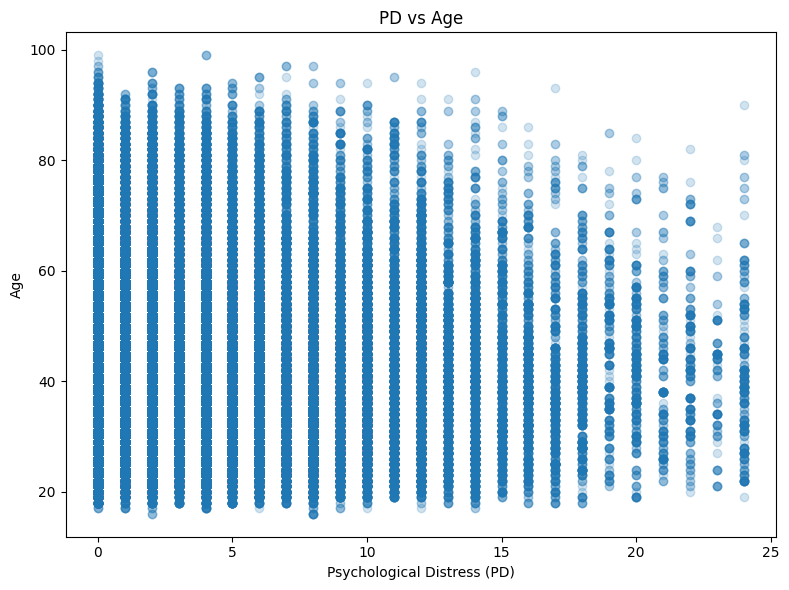

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data["pd"], data["age"], marker='o', alpha=0.2) 
plt.title("PD vs Age")
plt.ylabel("Age")
plt.xlabel("Psychological Distress (PD)")
#plt.hlines(y=67, xmin=data["pd"].min(), xmax=data["pd"].max(), colors='salmon')
plt.tight_layout()
plt.show()

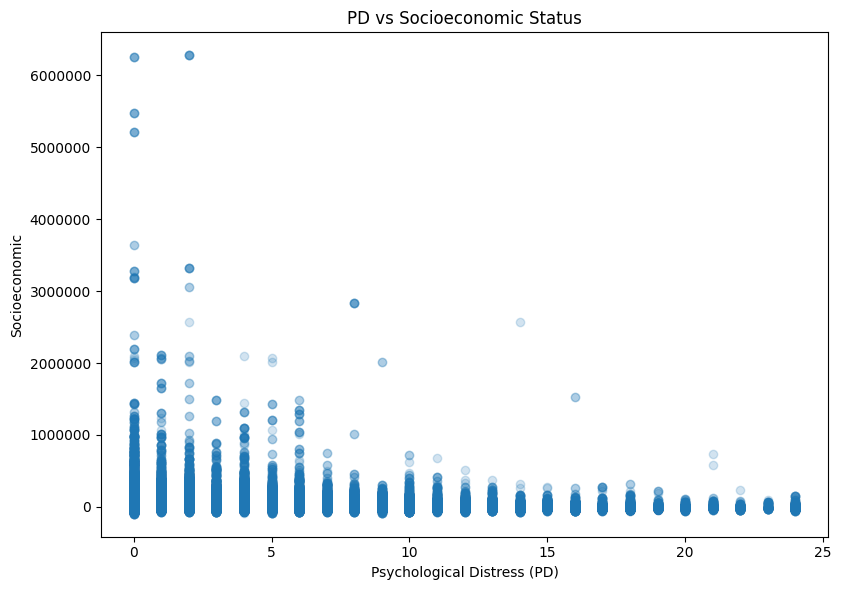

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(data["pd"], data["socioeconomic"], marker='o', alpha=0.2) 
plt.title("PD vs Socioeconomic Status")
plt.ylabel("Socioeconomic")
plt.xlabel("Psychological Distress (PD)")
plt.tight_layout()

# Use ScalarFormatter to format the y-axis values
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

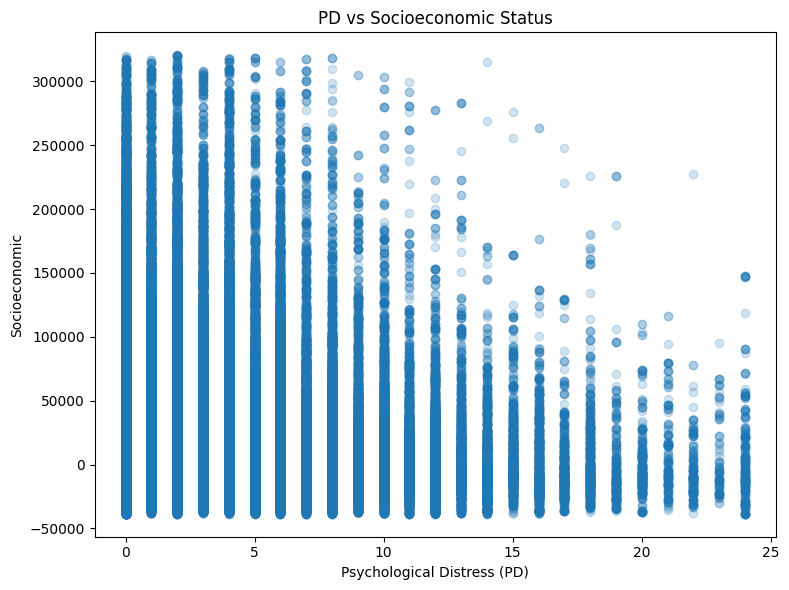

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df_trimmed["pd"], df_trimmed["socioeconomic"], marker='o', alpha=0.2) 
plt.title("PD vs Socioeconomic Status")
plt.ylabel("Socioeconomic")
plt.xlabel("Psychological Distress (PD)")
plt.tight_layout()

# Use ScalarFormatter to format the y-axis values
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

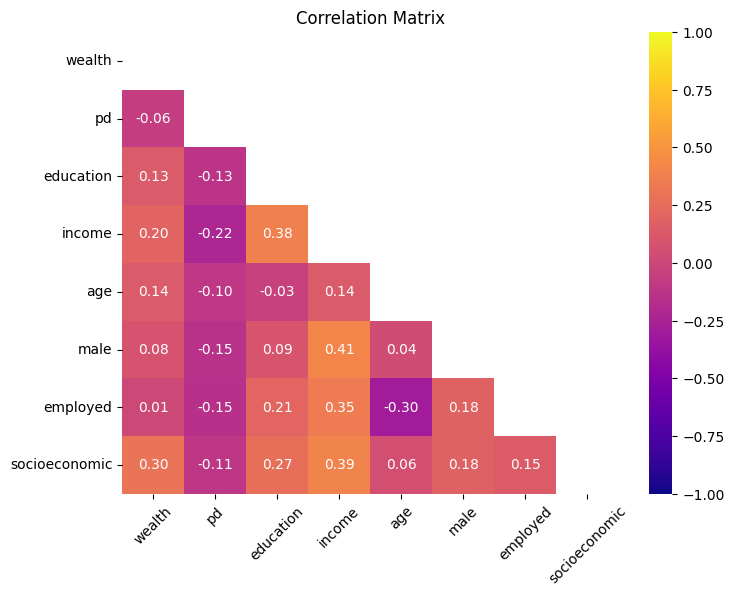

In [13]:
corr_matrix = data[["wealth", "pd", "education", "income", "age",
                   "male", "employed", "socioeconomic"]].corr()
plt.figure(figsize=(8, 6))

# Create heatmap with mask to show only bottom triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, cmap="plasma", mask=mask, vmin=-1, vmax=1, center=0, fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
plt.show()


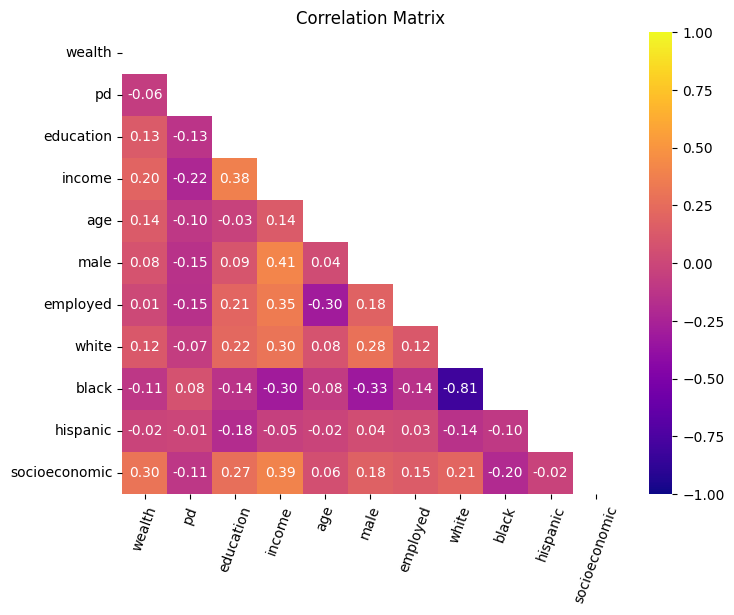

In [14]:
corr_matrix = data[["wealth", "pd", "education", "income", "age", "male", "employed",
          "white", "black", "hispanic", "socioeconomic"]].corr()
plt.figure(figsize=(8, 6))

# Create heatmap with mask to show only bottom triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, cmap="plasma", mask=mask, vmin=-1, vmax=1, center=0, fmt=".2f")
plt.xticks(rotation=70)
plt.title("Correlation Matrix")
plt.show()

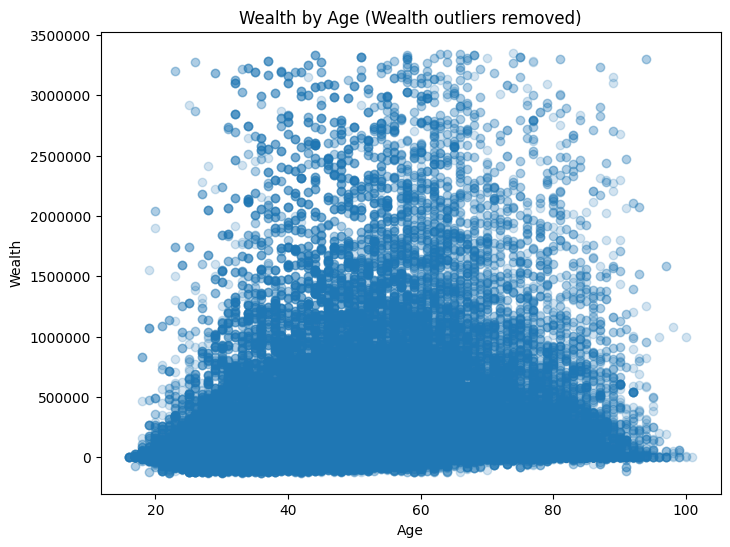

In [15]:
# Filter outliers (adjust thresholds based on analysis)
df_trimmed = data[
    (data["wealth"] > -128000) & (data["wealth"] < 3355000)
]

# Wealth vs. Age Scatterplot with Transformations and Removing Outliers
plt.figure(figsize=(8, 6))
plt.scatter(df_trimmed["age"], df_trimmed["wealth"], alpha=0.2)
plt.title("Wealth by Age (Wealth outliers removed)")
plt.ylabel("Wealth")
plt.xlabel("Age")

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [16]:
# Handle missing values
df_trim = data.drop(columns=["studentloan"])
df_trim = df_trim.dropna()

# Comparing OLS and Fixed-Effects Models

In [17]:
df_trim["ars_wealth"] = np.arcsinh(df_trim["wealth"])
df_trim["ars_ses"] = np.arcsinh(df_trim["socioeconomic"])

X = df_trim[['pd', 'age', 'male', 'black', 'education', 'income', 'ars_ses', 'black', 'hispanic', 'otherethnicity', 'employed', 'divorce', 'marriage', 'childbirth', 'familydeath', 'laidoff', 'missedwork']]
X = sm.add_constant(X)
y = df_trim['ars_wealth']

# OLS model (Pooled)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# Prepare the data for Fixed-Effects Model
df_trim = df_trim.set_index(['id', 'year'])

# Entity Fixed Effects Model 
entity_fe_model = PanelOLS.from_formula('ars_wealth ~ 1 + pd + age + male + education + income + ars_ses + black + hispanic + otherethnicity + employed + divorce + marriage + childbirth + familydeath + laidoff + missedwork + EntityEffects', data=df_trim, drop_absorbed=True)
entity_fe_results = entity_fe_model.fit()
print(entity_fe_results.summary)

# Time Fixed Effects Model
time_fe_model = PanelOLS.from_formula('ars_wealth ~ 1 + pd + age + male + education + income + ars_ses + black + hispanic + otherethnicity + employed + divorce + marriage + childbirth + familydeath + laidoff + missedwork + EntityEffects', data=df_trim, drop_absorbed=True)
time_fe_results = time_fe_model.fit()
print(time_fe_results.summary)

# Random Effects Model
re_model = RandomEffects.from_formula('ars_wealth ~ 1 + pd + age + male + education + income + ars_ses + black + hispanic + otherethnicity + employed + divorce + marriage + childbirth + familydeath + laidoff + missedwork + EntityEffects', data=df_trim)
re_results = re_model.fit()
print(re_results.summary)

                            OLS Regression Results                            
Dep. Variable:             ars_wealth   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     2346.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:32:32   Log-Likelihood:            -6.4456e+05
No. Observations:              187611   AIC:                         1.289e+06
Df Residuals:                  187594   BIC:                         1.289e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.9370      0.230    -38.

In [18]:
# Hausman Test to decide between FE and RE
comparison = compare({'Fixed Effects': entity_fe_results, 'Random Effects': re_results})
print(comparison)

                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable               ars_wealth        ars_wealth
Estimator                     PanelOLS     RandomEffects
No. Observations                187611            187611
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.0155            0.0744
R-Squared (Within)              0.0155            0.0075
R-Squared (Between)             0.1564            0.2767
R-Squared (Overall)             0.0952            0.1592
F-statistic                     155.17            942.73
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
Intercept                       1.5490           -4.5121
                              (5.0543)         (-18.583)
pd                             -0.0527           -0.0964
                             (-

# PD affects Wealth: Statistical Significance and Interaction Effects

In [19]:
# Handle missing values
df_trim = data.dropna()

# Prepare the data for Fixed-Effects Model
df_trim = df_trim.set_index(['id', 'year'])

# Truncation & Removal of Outliers for wealth and socioeconomic status
df_trim = df_trim[(df_trim['age'] > 18) & (df_trim['age'] < 68)]

def trim_outliers(df, column):
    lower_bound = df_trim[column].quantile(0.01)
    upper_bound = df_trim[column].quantile(0.99)
    return df_trim[(df_trim[column] >= lower_bound) & (df_trim[column] <= upper_bound)]

# Filter outliers (<1% & >99%, and working age from 18 to 67)
#df_trim = df[
#    (df["wealth"] > -128000) & (df["wealth"] < 3355000) & 
#    (df["age"] > 18) & (df["age"] < 68) &
#    (df["socioeconomic"] > -45713) & (df["socioeconomic"] < 342892)
#]

df_trim = trim_outliers(df_trim, 'wealth')
df_trim = trim_outliers(df_trim, 'socioeconomic')

# arcsinh transformation
df_trim["ars_wealth"] = np.arcsinh(df_trim["wealth"])
df_trim["ars_ses"] = np.arcsinh(df_trim["socioeconomic"])

In [20]:
# Create a high socioeconomic status indicator (top 25%)
df_trim['high_ses'] = (df_trim['ars_ses'] > df_trim['ars_ses'].quantile(0.75)).astype(int)

# Interaction term
df_trim['pd_high_ses'] = df_trim['pd'] * df_trim['high_ses']

# Fixed-Effects Model with interaction term
fe_model_ = PanelOLS.from_formula('ars_wealth ~ 1 + pd + age + male + education + income + ars_ses + black + hispanic + otherethnicity + employed + divorce + marriage + childbirth + familydeath + laidoff + missedwork + EntityEffects', data=df_trim, drop_absorbed=True)
fe_results_ = fe_model_.fit()
print(fe_results_.summary)

# Fixed-Effects Model with interaction term
fe_model_interaction = PanelOLS.from_formula('ars_wealth ~ 1 + pd + pd*high_ses + age + male + black + hispanic + otherethnicity + education + income + ars_ses + employed + divorce + marriage + childbirth + familydeath + laidoff + missedwork + EntityEffects', data=df_trim, drop_absorbed=True)
fe_results_interaction = fe_model_interaction.fit()
print(fe_results_interaction.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:             ars_wealth   R-squared:                        0.0098
Estimator:                   PanelOLS   R-squared (Between):              0.0736
No. Observations:               64203   R-squared (Within):               0.0098
Date:                Mon, Jun 10 2024   R-squared (Overall):              0.0525
Time:                        11:32:39   Log-likelihood                -1.929e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      26.873
Entities:                       20793   P-value                           0.0000
Avg Obs:                       3.0877   Distribution:                F(16,43394)
Min Obs:                       1.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             26.873
                            